<a href="https://colab.research.google.com/github/jsb616/AIStudy25/blob/master/07_03_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC(%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83%2C%EC%BD%9C%EB%B0%B1%2C%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**인공신경망을 구성하는 절차**

1. 더미데이터 준비
2. 훈련용, 검증용, 테스트용으로 나눔
3. 심층을 만듦(dense)
4. model에 적용
5. 컴파일 진행(최적화 기법을 적용 : adam)
6. evaluate(검증)

손실 곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련 과정이 상세하게 출력되어 확인할 수 있다. (에포크 횟수, 손실, 정확도)

아래쪽에 이 출력 메세지가 나옴

코렙 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행 결과를 자동으로 출력

<br>

다시 말해 fit() 메서드는 History라는 클래스 객체를 반환함 (훈련 과정의 지표, 손실, 정확도 등 내장)

이 값을 잘 활용하면 그래프를 그릴 수 있다.

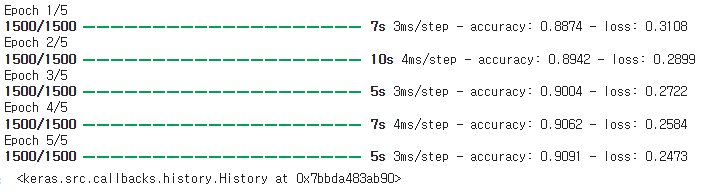

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
                        keras.datasets.fashion_mnist.load_data()
# 엔터효과 제거용 \ -> 한줄로 긴 문장을 자름

train_scaled = train_input / 255.0      # 0~1 사이값으로 정규화

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
print('훈련 데이터 :', train_scaled.shape, train_target.shape)
print('검증 데이터 :', val_scaled.shape, val_target.shape)
print('테스트 데이터 :', test_input.shape, test_target.shape)

훈련 데이터 : (48000, 28, 28) (48000,)
검증 데이터 : (12000, 28, 28) (12000,)
테스트 데이터 : (10000, 28, 28) (10000,)


In [3]:
# 모델을 만드는 함수를 정의함 (하나의 매개변수를 받아 리턴) .model_fn(dense 추가하면 생성이 되게)
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))    # 반복적으로 사용되는 입력층
    model.add(keras.layers.Dense(100, activation='relu'))   # 반복적으로 사용되는 2진분류 층

    # model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함
    if a_layer:
        model.add(a_layer)      # 매개값으로 넘어오는 추가되는 층
    model.add(keras.layers.Dense(10, activation='softmax')) # 반복적으로 사용되는 다중분류 층
    return model

In [4]:
model = model_fn()      # 위에서 만든 메서드 호출하여 모델에 담음
model.summary()         # 모델의 요약 정보

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#                       다중분류                                정확도

In [6]:
# fit() 메서드 결과를 history 변수에 담아 봄
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)    # 26초 걸림
#                                                         훈련과정 출력을 조절함
# verbose=0 훈련과정을 나타내지 않음
# verbose=1(기본값) 에포크마다 진행 막대와 함께 손실 등의 지표가 출력
# verbose=2 진행 막대 빼고 출력

In [7]:
print(history)      # 위에 fit한 결과를 History 객체가 가지고 있는데, 이것을 history 변수에 담음

In [9]:
print(history.history)

{'accuracy': [0.8112499713897705, 0.8585625290870667, 0.8728541731834412, 0.8809791803359985, 0.8873124718666077], 'loss': [0.5311373472213745, 0.39031779766082764, 0.3522854745388031, 0.33061161637306213, 0.31411638855934143]}


In [8]:
print(history.history.keys())
# 훈련 측정 값이 담겨 있는 history 딕셔너리가 존재함
# 정확도 accuracy, 손실 loss 값이 있다.

# 정확도는 compile() 메서드의 metrics 매개변수에 accuracy를 추가했기 때문에 history 속성에 포함되었음

dict_keys(['accuracy', 'loss'])


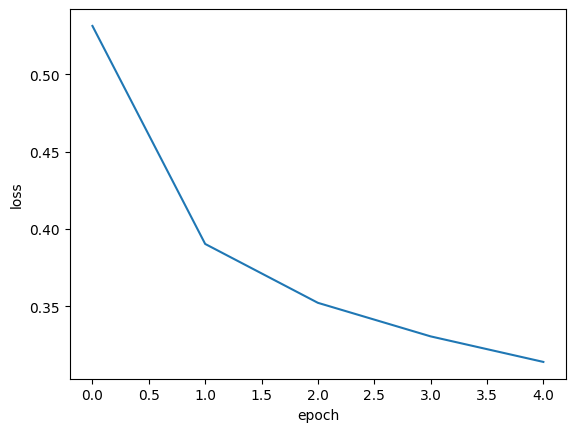

In [10]:
import matplotlib.pyplot as plt
# history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능
plt.plot(history.history['loss'])   # 손실율을 차트로 표시
plt.xlabel('epoch')     # 파이썬 인덱스는 0부터 시작함. 5개의 에포크가 0~4까지 x축에 표현
plt.ylabel('loss')      # 손실된 값
plt.show()

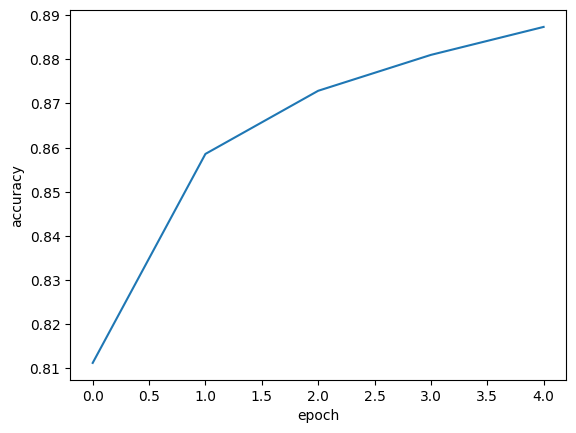

In [11]:
# 이번에는 정확도를 출력해보자
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 결과 분석 : 에포크마다 손실이 감소하고 정확도가 향상함

In [12]:
# 이번에는 에포크 횟수를 20번으로 늘려보자
model = model_fn()      # 위에서 만든 메서드로 모델 생성 (3개층 : 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)   # 2분 정도 걸림

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


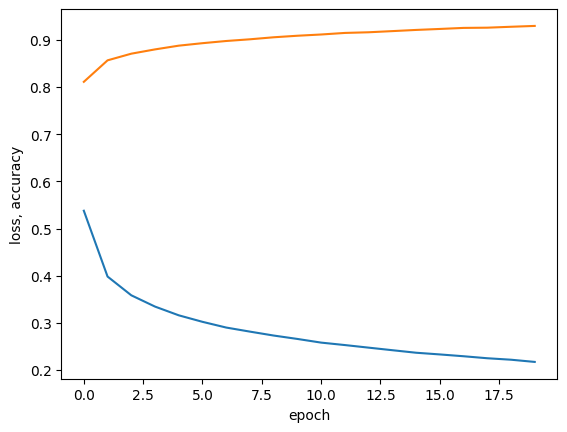

In [13]:
plt.plot(history.history['loss'])   # 손실율(파랑)
plt.plot(history.history['accuracy'])   # 정확도(주황)
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

**검증 손실 validation_data=(val_scaled, val_target)**

예전에 확률적 경사 하강법을 사용했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다.

인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용된다.

<br>

에포크에 따른 과대적합, 과소적합을 파악하려면 훈련 세트 점수와 검증 세트에 대한 점수도 필요하다.

그래서 위에처럼 훈련세트에 손실과 정확도만 그리면 파악이 어렵다.

검증 손실을 이용해서 과대/과소 적합을 응용하겠다.

<br>

keypoint (https://wikidocs.net/236194)

손실을 사용하는 것과 정확도를 사용하는 것의 차이는?

인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수임

손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데

모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋은 방법임

In [14]:
model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))
#                   검증 손실을 구하기 위한 매개값 추가됨
# 3분 정도 걸림

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7609 - loss: 0.6817 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8512 - loss: 0.4081 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8755 - loss: 0.3391 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8849 - loss: 0.3211 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8915 - loss: 0.3082 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8999 - loss: 0.2868 

In [15]:
print(history.history.keys())
# 정확도 accuracy, 손실 loss 값이 있다.
# 추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss가 나옴

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


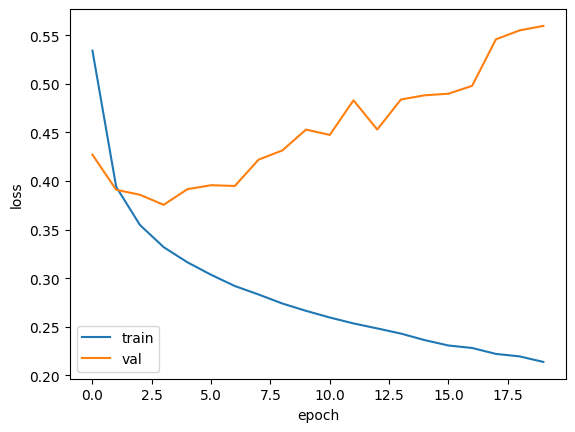

In [16]:
# 과대/과소 적합 문제를 조사하기 위해서 훈련손실, 검증손실을 한 그래프에 그려서 비교해보자
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

결과 분석 : 초기에 검증 손실이 감소하다가 다섯번째 에포크만에 다시 상승함

훈련 손실은 꾸준히 감소하기 때문에 과대적합 모델이 만들어짐

검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고 검증세트에 대한 정확도가 증가할 것 같다.

<br>

과대 적합을 막기 위한 방법으로 예전에 사용했던 규제 방식 대신에

신경망에 특화된 규제 방법(드롭아웃)을 나중에 해보자.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


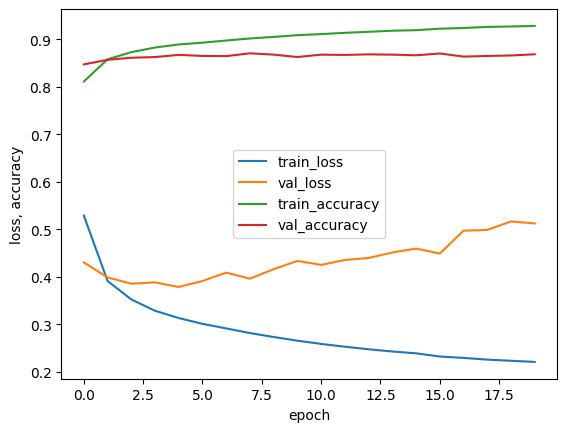

In [17]:
# 지금은 옵티마이저 하이퍼 파라미터를 조절하여 과대적합을 완화시켜보자.
# RMSprop 옵티마이저는 많은 문제에서 잘 동작합니다. -> 다른 방법으로는 Adam이 있다.
model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


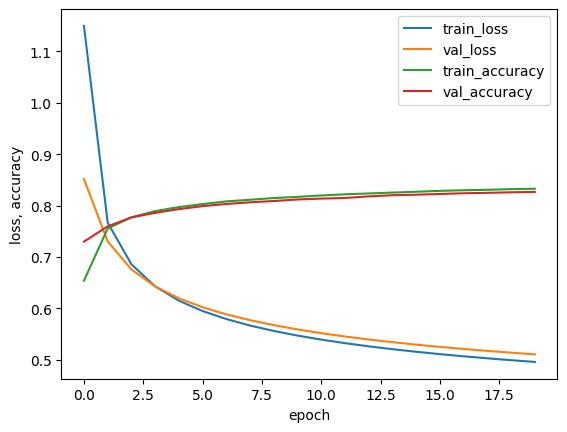

In [18]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()    # Adagrad 기법으로 최적화 후 차트로 보자
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


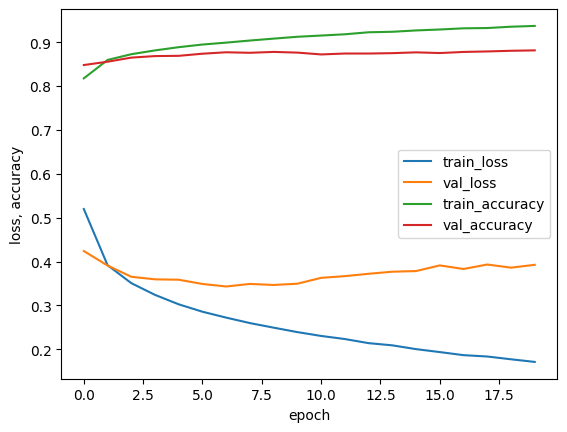

In [19]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

3가지의 최적화 기법을 사용해보니 adam이 안정적으로 보인다.

대신 과대적합을 막기 위한 기법이 필요해보인다.

<br>

드롭 아웃(Dropout)은 딥러닝의 기초가 되는 제프리 힌턴이 소개하였다.

훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0으로 만듦) 과대 적합을 막음

<br>

어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없음

다른 샘플을 처리할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 h1 출력이 없음

뉴런은 랜덤하게 드룹아웃되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼 파라미터에 정할 것임

<br>

드롭 아웃이 왜 과대 적합을 막을 수 있을지 생각을 해보면, 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함

일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

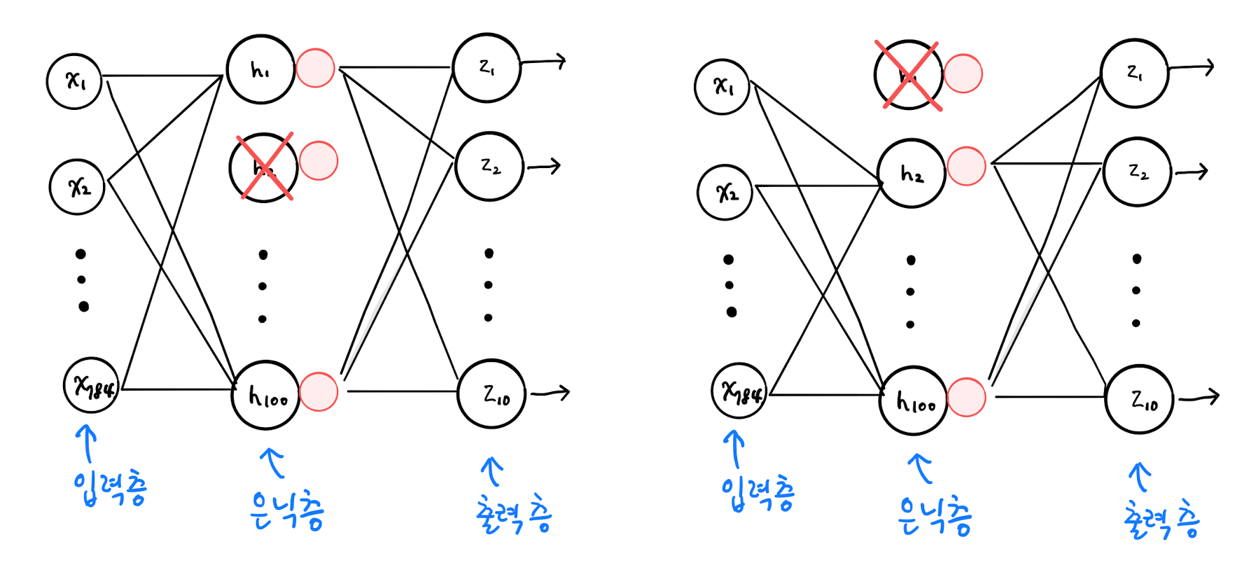

또 다른 분석

앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면

드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것처럼 상상하게 됨

앙상블 : 더 좋은 예측을 만들기 위해 여러 개의 모델을 훈련하는 머신러닝 알고리즘.
과대 적합을 막아주는 좋은 기법

<br>

케라스에서 드롭아웃을 keras.layers.Dropout으로 제공함

어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듦

드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음

In [20]:
# model_fn 함수에 드롭아웃 객체를 전달하여 층을 추가함
model = model_fn(keras.layers.Dropout(0.3))     # 30% 정도 드롭아웃
model.summary()     # 요약 확인

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

은닉층 뒤에 추가된 드롭아웃 층(3번째 값)은 훈련되는 모델 파라미터가 없음

입력과 출력의 크기가 같음

일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음

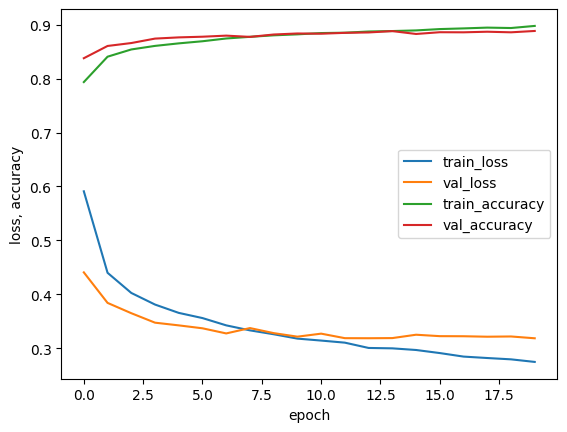

In [21]:
# 주의사항 : 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다.
# 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨
# 탠서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음

# 훈련 손실과 검증 손실의 그래프를 그려보자
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

과대 적합이 확실이 줄어듦. 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음

20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해볼까??? (조기종료에서 해보자.)

In [23]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

model.save('model-whole-ep10.keras')    # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있다.
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장함 https://geunuk.tistory.com/466

model.save_weights('model-ep10.weights.h5')     # HDF5 형식으로도 저장됨(폴더에서 확인)

In [24]:
# 이제는 저장한 모델을 불러와 테스트를 진행해보자.
!ls -al model*

-rw-r--r-- 1 root root 976600 Mar 17 03:15 model-ep10.weights.h5
-rw-r--r-- 1 root root 979391 Mar 17 03:15 model-whole-ep10.keras


In [25]:
# 실험 1
# 훈련하지 않은 새로운 모델을 만들고 model-ep10.weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용

# model_fn() 위와 동일한 모델
model = model_fn(keras.layers.Dropout(0.3))     # 훈련하지 않은 새로운 모델

model.load_weights('model-ep10.weights.h5')     # 이전에 저장했던 모델 파라미터를 로딩
# 이때 사용하는 메서드는 save_weights()와 쌍을 이루는 load_weights() 메서드임
# 주의사항 : load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 함

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 모델의 검증 정확도를 확인해보자.
import numpy as np

# predict() 메서드는 사이킷런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환 (다중분류)

# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플수는 12,000개이기 때문에
# predict() 메서드는 (12000, 10) 크기의 배열을 반환
# 10개의 확률 중 가장 큰 값의 인덱스를 골라(.argmax) 타깃 레이블과 비교하여 정확도를 계산해보자
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# axis=-1 배열의 마지막 차원을 따라 최대값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예를 들어 아래 그림처럼 5x3 배열에 axis=1로 한 값과 axis=0으로 한 값의 인덱스를 반환함

# argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교하여 같으면 1이 되고 다르면 0이 됨
# 이를 평균으로 출력해봄(정확도)
print(np.mean(val_labels == val_target))    # 88.1% 평균

# axis=1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고
# axis=0 이면 행을 따라 각 열의 최대값의 인덱스를 선택함.
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교
#   -> 두 배열에서 각 위치의 값이 같으면 1, 다르면 0 (평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.881


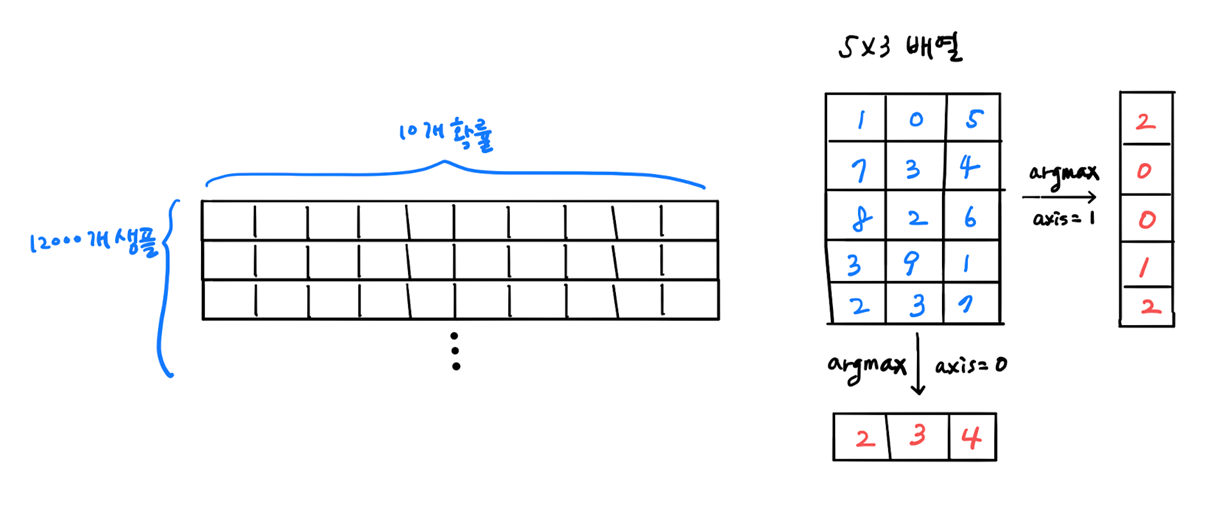

In [27]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해봄
model = keras.models.load_model('model-whole-ep10.keras')   # load_model() 저장된 케라스 파일 읽기

model.evaluate(val_scaled, val_target)  # 같은 모델을 불러들였기 때문에 위와 정확도가 같음

# 현 상태 분석 : 20번의 에포크동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인
# 모델을 과대적합되지 않은 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구해보자. -> 케라스 콜백

# https://ltlkodae.tistory.com/13 케라스 모델을 저장하는 방법 2가지 분석

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8820 - loss: 0.3282


[0.33033308386802673, 0.8809999823570251]

In [29]:
# 실험 2
# 아예 파일로 새로운 모델을 만들고 바로 사용해보자.
# 추가적으로 콜백이라는 것을 활용해보자.
# 콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체. 케라스의 콜백 패키지에 있다.
# fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용
# 지금 우리가 사용할 콜백은 ModelCheckpoint 콜백으로 에포크마다 모델을 저장함
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb])
# 모델 훈련 후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장됨

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7306 - loss: 0.7712 - val_accuracy: 0.8453 - val_loss: 0.4242
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8374 - loss: 0.4548 - val_accuracy: 0.8577 - val_loss: 0.3833
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8518 - loss: 0.4145 - val_accuracy: 0.8689 - val_loss: 0.3652
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8596 - loss: 0.3871 - val_accuracy: 0.8680 - val_loss: 0.3558
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8656 - loss: 0.3708 - val_accuracy: 0.8747 - val_loss: 0.3417
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8688 - loss: 0.3562 - val_accuracy: 0.8751 - val_loss: 0.3346
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8715 - loss: 0.3478 - val_accuracy: 0.8775 - val_loss: 0.3331
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8761 - loss: 0.338

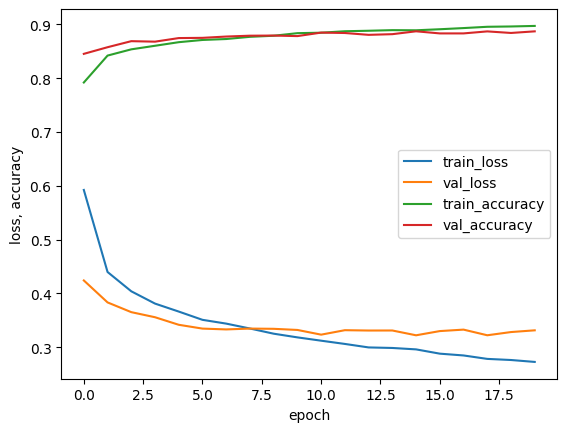

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8883 - loss: 0.3260


[0.33143556118011475, 0.8871666789054871]

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target)  # 검증세트의 성능 확인 (33.14%, 88.71%) 에포크 11번
# 결론 : 20번을 다 돌리고 좋은 점수가 나온 11번째 에포크를 저장함.

keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해주었음

여전히 20번의 에포크동안 훈련을 함

사실 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이 더 커지기 때문에 훈련을 계속할 필요가 없음.

이때 훈련을 종료하면 자원과 시간을 아낄 수 있음 -> 조기종료(early stopping)

<br>

조기 종료는 딥러닝 분야에 많이 사용하는 기법

에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 함 - 규제 방법 중 하나

In [31]:
# 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
# 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 회수로 지정
# patience=2 2번 역속 검증 점수가 향상되지 않으면 훈련을 중지 (patience:인내심)
# restore_best_weights=True -> 가장 낮은 검증 손실을 낸 모델 파라미터로 돌림

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)    # 얼리

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7266 - loss: 0.7919 - val_accuracy: 0.8414 - val_loss: 0.4355
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8372 - loss: 0.4564 - val_accuracy: 0.8520 - val_loss: 0.4022
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8496 - loss: 0.4185 - val_accuracy: 0.8648 - val_loss: 0.3676
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8554 - loss: 0.3942 - val_accuracy: 0.8684 - val_loss: 0.3628
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8642 - loss: 0.3715 - val_accuracy: 0.8702 - val_loss: 0.3529
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8678 - loss: 0.3628 - val_accuracy: 0.8737 - val_loss: 0.3456
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8721 - loss: 0.3496 - val_accuracy: 0.8721 - val_loss: 0.3487
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8783 - loss: 0.3376

In [32]:
print(early_stopping_cb.stopped_epoch)  # 조기종료 시점 에포크

12


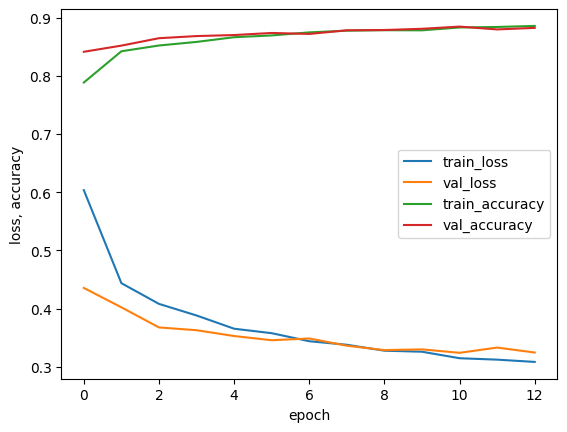

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8864 - loss: 0.3235


[0.32399022579193115, 0.8846666812896729]

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target)  # 검증세트의 성능 확인 (32.39%, 88.46%) 에포크 12번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함꼐 사용하면 최상의 모델을 자동으로 저장해 준다는 것을 명심